# 1) Выполните чтение набора данных в объект типа DataFrame, выведите первые пять строк и определите размеры (количество строк и столбцов) набора данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
ds = pd.read_csv('sample_data/5_Lin_reg_data_set_LR2.csv')
ds.shape

(500, 7)

In [ ]:
ds.rename(columns = {'Unnamed: 0' : 'Number'}, inplace = True)

In [ ]:
ds.head(5)

,Number,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,target
0,0,0.674083,0.579755,-1.058076,-0.665412,0.857527,148.106734
1,1,0.827302,-0.481899,-0.036755,-1.136412,-0.446800,-2.393139
2,2,0.500231,-0.650857,0.249053,-0.893209,-1.636656,-81.018202
3,3,-0.488363,-0.813776,2.281231,-0.467943,0.753307,-70.118624
4,4,0.175807,0.102490,1.006412,-0.503076,-0.123210,13.007047


# 2) Определите типы признаков (числовые или категориальные) и проверьте набор данных на наличие пропусков значений

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   Feature_1   500 non-null    float64
 2   Feature_2   500 non-null    float64
 3   Feature_3   500 non-null    float64
 4   Feature_4   500 non-null    float64
 5   Feature_5   500 non-null    float64
 6   target      500 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 27.5 KB


In [ ]:
cc.isna().sum()

Unnamed: 0    0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
target        0
dtype: int64

# 3) С помощью диаграммы pairplot из библиотеки seaborn определите от каких признаков целевая переменная зависит приблизительно линейно

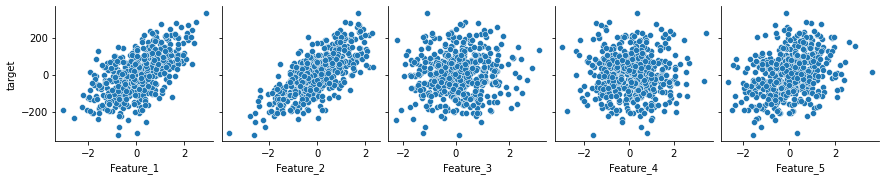

In [ ]:
sns.pairplot(ds, x_vars= ['Feature_1','Feature_2', 'Feature_3', 'Feature_4', 'Feature_5'], y_vars = ['target'])

# 4) Сохраните значения целевой переменной в отдельный набор данных Y
5) создайте набор данных X, содержащий один признак, влияющий линейно на целевую переменную

In [ ]:
Y = ds[['target']]
X = ds[['Feature_2']]

# 6) С помощью функции train_test_split() из библиотеки sklearn выполните разделение наборов данных X и Y на обучающую и тестовую выборки; размер тестовой выборки задайте равным 15% процентам от размера всего набора данных;

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15)

# 7) С помощью класса LinearRegression из библиотеки sklearn создайте модель линейно регрессии и выполните ее обучение с использованием обучающей выборки наборов данных X и Y

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

# 8) Выведите значения коэффициентов модели линейной регрессии; 

In [ ]:
lr.coef_, lr.intercept_

(array([[81.07801593]]), array([4.70605755]))

# 9) Выполните графическое построение функции линейной регрессии вместе с точечной диаграммой, связывающей признаки обучающей выборки и целевую переменную;
10) выполните графическое построение функции линейной регрессии вместе
с точечной диаграммой, связывающей признаки тестовой выборки и целевую переменную; 

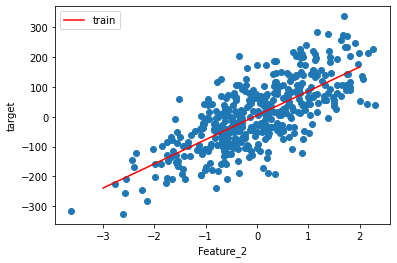

In [ ]:
plt.scatter(X_train, Y_train)

def lin_F(x, lr = lr):
  return lr.coef_ * x + lr.intercept_

m = [[-3],
     [-2],
     [-1],
     [0],
     [1],
     [2]]
plt.plot(m, lin_F(m), c = 'r', label = 'train')
plt.xlabel('Feature_2')
plt.ylabel('target')
plt.legend()
plt.show()

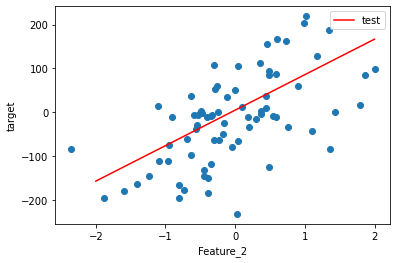

In [ ]:
plt.scatter(X_test, Y_test)

def lin_F(x, lr = lr):
  return lr.coef_ * x + lr.intercept_

m1 = [[-2],
     [-1],
     [0],
     [1],
     [2]]
plt.plot(m1, lin_F(m1), c = 'r', label = 'test')
plt.xlabel('Feature_2')
plt.ylabel('target')
plt.legend()
plt.show()

# 11) выполните предсказание значений целевой переменной для обучающей и тестовой выборок с помощью обученной модели линейной регрессии;

12) выполните визуализацию ошибок модели линейной регрессии для первых 5 объектов тестовой выборки;

13) выполните расчет метрик качества MAE и MSE для обучающей и тестовой выборок;



In [ ]:
Y_test_predicted = lr.predict(X_test)
Y_train_predicted = lr.predict(X_train)

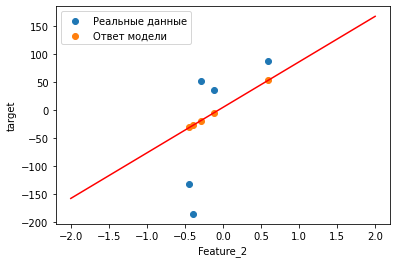

In [ ]:
plt.scatter(X_test[:5], Y_test[:5], label = 'Реальные данные')
plt.scatter(X_test[:5], Y_test_predicted[:5], label = 'Ответ модели')
plt.plot(m1, lin_F(m1), c = 'r')
plt.xlabel('Feature_2')
plt.ylabel('target')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(Y_train,Y_train_predicted), mean_absolute_error(Y_test,Y_test_predicted)

(63.15001768895849, 68.48124191338631)

In [ ]:
mean_squared_error(Y_train,Y_train_predicted), mean_squared_error(Y_test,Y_test_predicted)

(6019.27779532438, 7020.8287013995)

# 14) повторите п. 5-13 для случая предсказания целевой переменной по двум признакам и для случая предсказания целевой переменной по всем признакам набора данных по аналогии с примерами из п.2.3.3 и п.2.3.4. 

In [165]:
X2 = ds.drop(columns = ['Number', 'Feature_3', 'Feature_4', 'Feature_5', 'target'])
Y2 = ds['target']

In [167]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.15)
lr2 = LinearRegression()
lr2.fit(X2_train, Y2_train)
lr2.coef_, lr2.intercept_

(array([67.49369487, 81.24437761]), -0.36774064925447414)

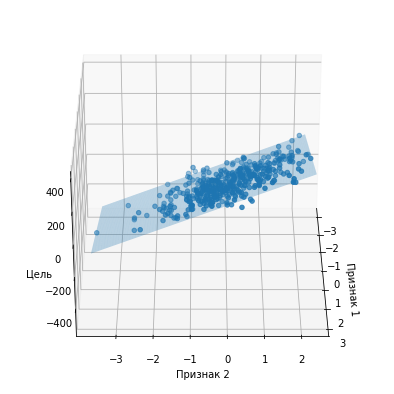

In [178]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(projection = '3d')

ax.scatter(X2_train['Feature_1'], X2_train['Feature_2'], Y2_train, marker = 'o')
ax.set_xlabel('Признак 1')
ax.set_ylabel('Признак 2')
ax.set_zlabel('Цель')

x_1d_values = np.linspace(X2_train['Feature_1'].min(), X2_train['Feature_1'].max())
y_1d_values = np.linspace(X2_train['Feature_2'].min(), X2_train['Feature_2'].max())
x_2d, y_2d = np.meshgrid(x_1d_values, y_1d_values)
z = lr2.coef_[0]*x_2d + lr2.coef_[1]*y_2d +lr2.intercept_

ax.plot_surface(x_2d, y_2d, z, alpha = 0.3)

ax.view_init(30, 0, vertical_axis = 'z')
plt.show()

In [180]:
Y2_test_predicted = lr2.predict(X2_test)
Y2_train_predicted = lr2.predict(X2_train)
mean_squared_error(Y2_train,Y2_train_predicted), mean_squared_error(Y2_test,Y2_test_predicted)

(1754.0049544802412, 1795.5177621630928)

In [188]:
mean_absolute_error(Y_train,Y_train_predicted), mean_absolute_error(Y_test,Y_test_predicted)

(63.15001768895849, 68.48124191338631)

In [182]:
ds2 = pd.get_dummies(ds)
ds2.head(10)

,Number,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,target
0,0,0.674083,0.579755,-1.058076,-0.665412,0.857527,148.106734
1,1,0.827302,-0.481899,-0.036755,-1.136412,-0.446800,-2.393139
2,2,0.500231,-0.650857,0.249053,-0.893209,-1.636656,-81.018202
3,3,-0.488363,-0.813776,2.281231,-0.467943,0.753307,-70.118624
4,4,0.175807,0.102490,1.006412,-0.503076,-0.123210,13.007047
5,5,-1.861904,-0.587932,0.647617,-0.582654,-0.383947,-207.793615
6,6,0.858985,1.124214,-2.208796,0.491940,0.934072,188.513273
7,7,-0.211756,0.689726,1.472528,1.096400,-0.178785,31.704301
8,8,-0.564478,0.180926,-0.912560,-1.058603,0.297211,-11.623145
9,9,0.833402,-1.101006,-0.163183,0.153328,1.125325,13.342924


In [184]:
Xa = ds.drop(columns = ['target'])
Ya = ds['target']
Xa_train, Xa_test, Ya_train, Ya_test = train_test_split(Xa, Ya, test_size = 0.15)

In [185]:
lra = LinearRegression()
lra.fit(Xa_train, Ya_train)
lra.coef_, lra.intercept_

(array([ 2.12451490e-03,  6.90047945e+01,  8.22115662e+01,  6.04127001e-01,
        -1.00516185e-01,  4.13741759e+01]), -0.5474898186048369)

In [187]:
Ya_test_predicted = lra.predict(Xa_test)
Ya_train_predicted = lra.predict(Xa_train)
mean_squared_error(Ya_train,Ya_train_predicted), mean_squared_error(Ya_test,Ya_test_predicted)

(94.11870200750451, 95.18967458241218)

In [189]:
mean_absolute_error(Ya_train,Ya_train_predicted), mean_absolute_error(Ya_test,Ya_test_predicted)

(7.777840250861182, 7.74988028996952)